# 데이터 불러오기

In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

diabetes = pd.read_csv('../datasets/diabetes (3).csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 상관관계 파악

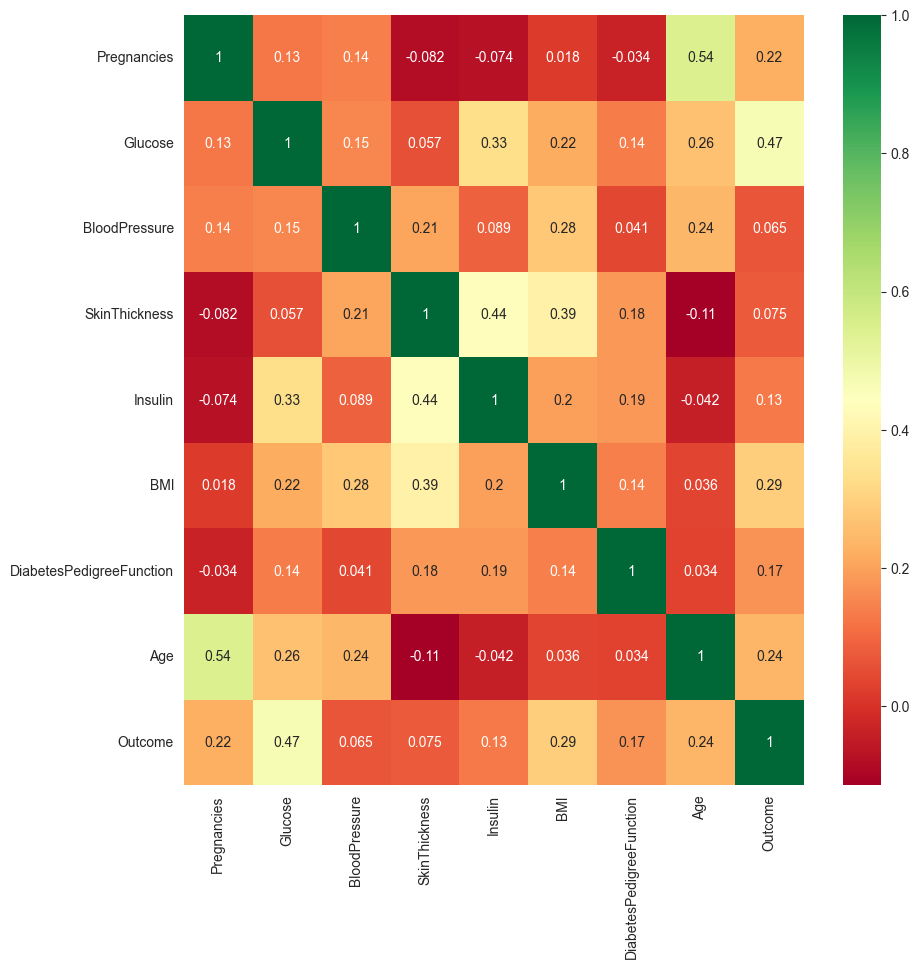

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
p = sns.heatmap(diabetes.corr(),annot=True,cmap='RdYlGn')

# 로지스틱회귀 / 랜덤포레스트
- penalty{'l1', 'l2', 'elasticnet', 'none'}, default='l2'
- solver{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
    * 'newton-cg' : 'l2', 'none'
    * 'lbfgs' : 'l2', 'none'
    * 'liblinear' : 'l1', 'l2'
    * 'sag' : 'l2', 'none'
    * 'saga' : 'l1', 'l2', 'elasticnet', 'none'
- l1_ratio => penalty가 'elasticnet'일 때 지정해줘야함

In [120]:
lr_clf = LogisticRegression(penalty='l2')
rf_clf = RandomForestClassifier(random_state = 10)

X = diabetes[['BMI','Glucose', 'Age']]
y = diabetes['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [121]:
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

pred1 = lr_clf.predict(X_test)
pred2 = rf_clf.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test, pred2))

0.7272727272727273
0.7597402597402597
